In [1]:
#import
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)

In [2]:
#binaryデータを開く関数
def open_grd(gpv_file):
  with open(gpv_file, 'rb') as ifile:
#    data = np.fromfile(ifile, dtype='f4', sep = '')
    data = np.fromfile(ifile, dtype='f8', sep = '')
  return data

In [3]:
#　ＧＰＵの確認
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16882012321803603590]

In [4]:
#parameter
#phase = ['uinfdown','uinfup','umax','umin']
phase1 = 1
phase2 = 2
phase3 = 3
phase4 = 4
phase = [phase1,phase2,phase3,phase4]
num_class = len(phase)
file_num0 = [67,71,66,72,70,67,64,66,65,69,72,69,67,64,67,62,65,66,64,69,
             69,68,67,66,64,67,68,70,70,70,70,66,68,67,68,69,71,69,66,65]
file_num1 = [int(n/4) for n in file_num0]
#nx=102
#ny=102
#nz=1
#model_name = 'sl_cnn_phase4_all_10.h5'
file_num = sum(file_num0)
#file_num = sum(file_num1)
test_size = 0.1

In [36]:
#fileの読み込み(位相平均データ)　自発光　解像度1
nx=1024
ny=1024
nz=1
model_name = 'sl_cnn_phase4_all_1.h5'
data_root = 'D:/conbustion_ocillation/Phase_ins_field/resolution1/'
data_origin = np.zeros((file_num,nx,ny,nz))
#data_origin = []
phase_num = np.zeros((file_num*nz,num_class))
nf = 0
for t in range(1,10+1):
    for ph in range(1,4+1):
#        for n in range(file_num0[(t-1)*4-1+ph]):
        for n in range(file_num1[(t-1)*4-1+ph]):
                data_name = 'phasemean_'+str(ph)+'_'+str(t)+'_'+str(int(n+1))+'.dat'
                file_path = os.path.join(data_root, data_name)
                data_origin[nf,:,:,:] = open_grd(file_path).reshape(nx,ny,nz)
                phase_num[nf,ph-1] = 1
                nf = nf+1
        

ValueError: cannot reshape array of size 1048576 into shape (102,102,1)

In [6]:
#%%time
#fileの読み込み(位相平均データ) 　自発光　解像度1/10
nx=102
ny=102
nz=1
model_name = 'sl_cnn_phase4_all_10.h5'
data_root = '/Volumes/MATSU_HD/燃焼振動データ/Phase_ins_field/resolution10/'
data_origin = np.zeros((file_num,nx,ny,nz))
phase_num = np.zeros((file_num*nz,num_class))
nf = 0
for t in range(1,10+1):
    for ph in range(1,4+1):
        for n in range(file_num0[(t-1)*4-1+ph]):
                data_name = 'phasemean_'+str(ph)+'_'+str(t)+'_'+str(int(n+1))+'.dat'
                file_path = os.path.join(data_root, data_name)
                data_origin[nf,:,:,:] = open_grd(file_path).reshape(nx,ny,nz)
                phase_num[nf,ph-1] = 1
                nf = nf+1

CPU times: user 923 ms, sys: 2.13 s, total: 3.06 s
Wall time: 10min 3s


In [5]:
%%time
#fileの読み込み(位相平均データ) 速度場　解像度1
nx=191
ny=98
nz=1
model_name = "velo_v_cnn_phase4_all_1.h5"
data_root = '/Volumes/MATSU_HD/燃焼振動データ/velocity_field/resolution1/'
data_origin = np.zeros((file_num,nx,ny,nz))
phase_num = np.zeros((file_num*nz,num_class))
nf = 0
for t in range(1,10+1):
    for ph in range(1,4+1):
        for n in range(file_num0[(t-1)*4-1+ph]):
                data_name = 'phasemean_'+str(ph)+'_'+str(t)+'_'+str(int(n+1))+'.dat'
                file_path = os.path.join(data_root, data_name)
                data_origin[nf,:,:,:] = open_grd(file_path).reshape(nx,ny,nz)
                phase_num[nf,ph-1] = 1
                nf = nf+1

CPU times: user 1.09 s, sys: 2.39 s, total: 3.49 s
Wall time: 15min 6s


In [5]:
%%time
#fileの読み込み(位相平均データ) 速度場　解像度5
nx=38
ny=19
nz=1
model_name = "velo_v_cnn_phase4_all_5.h5"
data_root = '/Volumes/MATSU_HD/燃焼振動データ/velocity_field/resolution5/'
data_origin = np.zeros((file_num,nx,ny,nz))
phase_num = np.zeros((file_num*nz,num_class))
nf = 0
for t in range(1,10+1):
    for ph in range(1,4+1):
        for n in range(file_num0[(t-1)*4-1+ph]):
                data_name = 'phasemean_'+str(ph)+'_'+str(t)+'_'+str(int(n+1))+'.dat'
                file_path = os.path.join(data_root, data_name)
                data_origin[nf,:,:,:] = open_grd(file_path).reshape(nx,ny,nz)
                phase_num[nf,ph-1] = 1
                nf = nf+1

CPU times: user 676 ms, sys: 1.41 s, total: 2.09 s
Wall time: 3min 29s


In [6]:
%%time
#データの切り取りと正規化
for nn in range(file_num):
    l = np.max(abs(data_origin[nn]))
    data_origin[nn] = data_origin[nn]/ l
#    for i in range(nx):
#        for j in range(ny):
#            data_origin[nn, i, j,nz-1] = data_origin[nn, i,j, nz-1]/ l

CPU times: user 278 ms, sys: 8.83 ms, total: 287 ms
Wall time: 288 ms


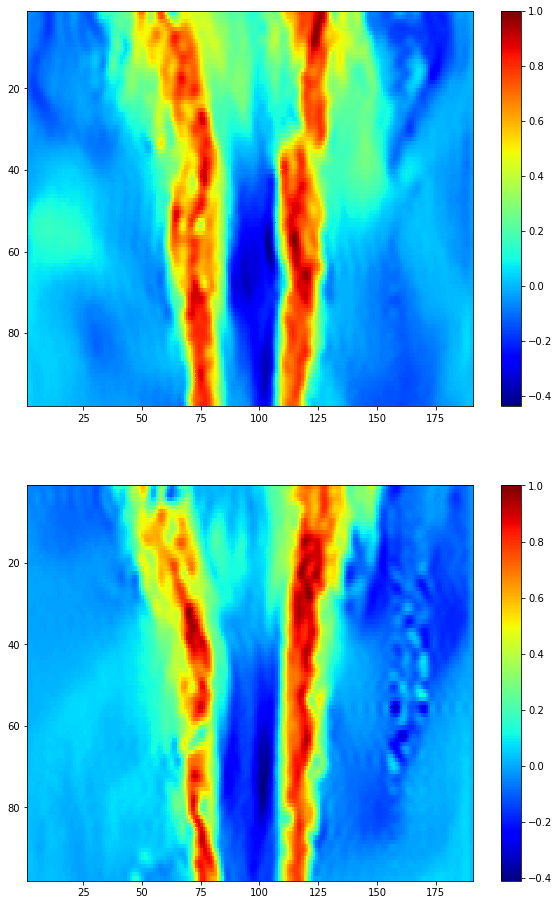

In [7]:
#データ図示
plt.figure(1, figsize=(10, 16))
plt.subplot(2,1,1)
plt.pcolor(data_origin[600].reshape(ny,nx),cmap='jet')
plt.colorbar()
plt.xlim(1, nx)
plt.ylim(ny, 1)

plt.subplot(2,1,2)
plt.pcolor(data_origin[605].reshape(ny,nx),cmap='jet')
plt.colorbar()
plt.xlim(1, nx)
plt.ylim(ny, 1)

plt.show()

In [8]:
#target確認
print(phase_num[600])
print(phase_num[650])
print(phase_num[701])
print(phase_num[800])

[1. 0. 0. 0.]
[0. 1. 0. 0.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]


In [9]:
#データの変形
print('data_origin shape=',data_origin.shape)

data_origin shape= (2700, 191, 98, 1)


In [10]:
#学習データとtestデータに分割
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(data_origin, phase_num, test_size=test_size,random_state=1)
print(x_test.shape)
print(x_train.shape)
#del data_origin

(270, 191, 98, 1)
(2430, 191, 98, 1)


In [11]:
#ｍｏｄｅｌのロード
from tensorflow.keras.models import load_model
##model_name = 'velo_v_cnn_phase2_all_1.h5'
logname = data_root + model_name
model = load_model(logname)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 191, 98, 8)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 95, 49, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 49, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8832)              0

In [12]:
#評価
score = model.evaluate(x_test, y_test, verbose = 1)
print('Test loss: ', score[0])
print('Tset accuracy: ', score[1])

9/9 [==============================] - 1s 51ms/step - loss: 0.3558 - accuracy: 0.9074
Test loss:  0.35584306716918945
Tset accuracy:  0.9074074029922485


In [44]:
layer_name = 'conv2d_2'

Model: "model_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 191, 98, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 191, 98, 8)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 95, 49, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 49, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 24, 32)        4640      
Total params: 5,888
Trainable params: 5,888
Non-trainable params: 0
________________________________________________________

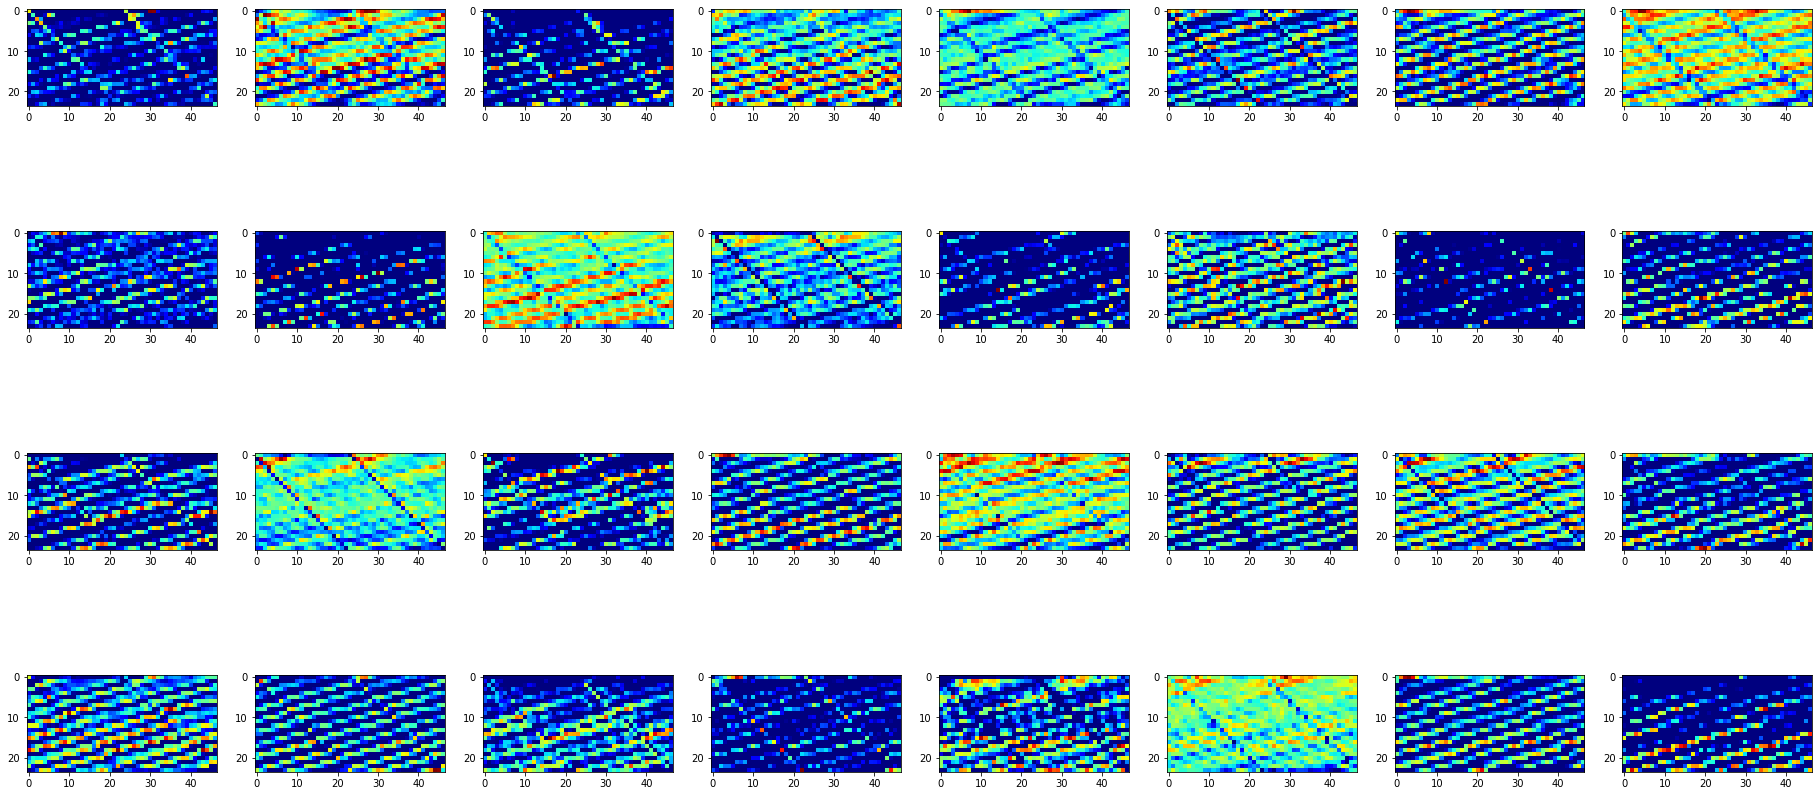

In [49]:
#  ある画像に対する中間層
from tensorflow.keras.models import Model
#layer_name = 'conv2d'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_layer_model.summary()
#intermediate_output = intermediate_layer_model.predict(data_origin[600].reshape(1,nx,ny,1))#phase4
ntermediate_output = intermediate_layer_model.predict(x_test)
interintermediate_output = intermediate_output.reshape(intermediate_output.shape[3],intermediate_output.shape[1],intermediate_output.shape[2])
print('intermediate_output.shape=',intermediate_output.shape)

nn=intermediate_output.shape[3]
nh=8
nw=8
plt.figure(1, figsize=(nw*4, nh*4))

#plt.axis('equal')
#plt.axis('square')

for n in range(nn):
    plt.subplot(nw,nh,n+1)
    w = intermediate_output[0, :, :, n].copy()
#    plt.pcolor(w.reshape(ny,nx),cmap='jet')
#    plt.xlim(1, nx)
#    plt.ylim(ny, 1)
    m = w.min()
    M = w.max()
    w = (w-m)/(M-m)
    plt.imshow(w.reshape(intermediate_output.shape[2],intermediate_output.shape[1]),cmap='jet')

intermediate_output.shape= (1, 191, 98, 8)


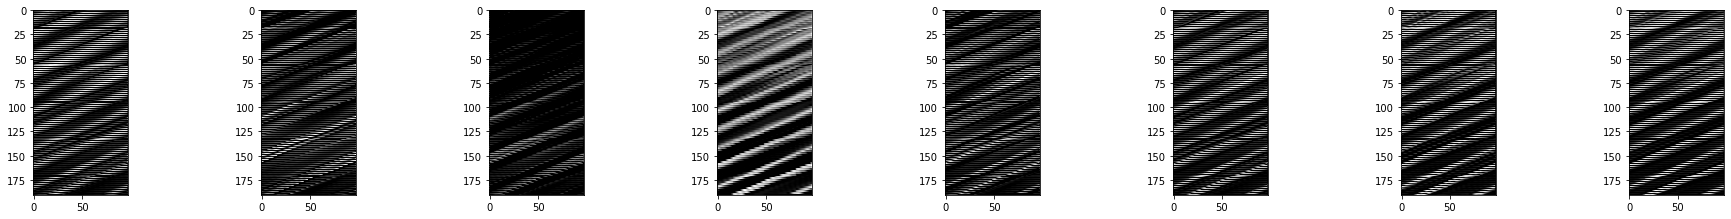

In [43]:
#  ある画像に対する中間層
from tensorflow.keras.models import Model
#layer_name = 'conv2d'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(data_origin[650].reshape(1,nx,ny,1))#phase4
print('intermediate_output.shape=',intermediate_output.shape)

nn=intermediate_output.shape[3]
nh=8
nw=8
plt.figure(1, figsize=(nw*4, nh*4))

#plt.axis('equal')
#plt.axis('square')

for n in range(nn):
    plt.subplot(nw,nh,n+1)
    w = intermediate_output[0, :, :, n].copy()
    m = w.min()
    M = w.max()
    w = (w-m)/(M-m)
    plt.imshow(w,cmap='gray')

intermediate_output.shape= (1, 47, 24, 32)


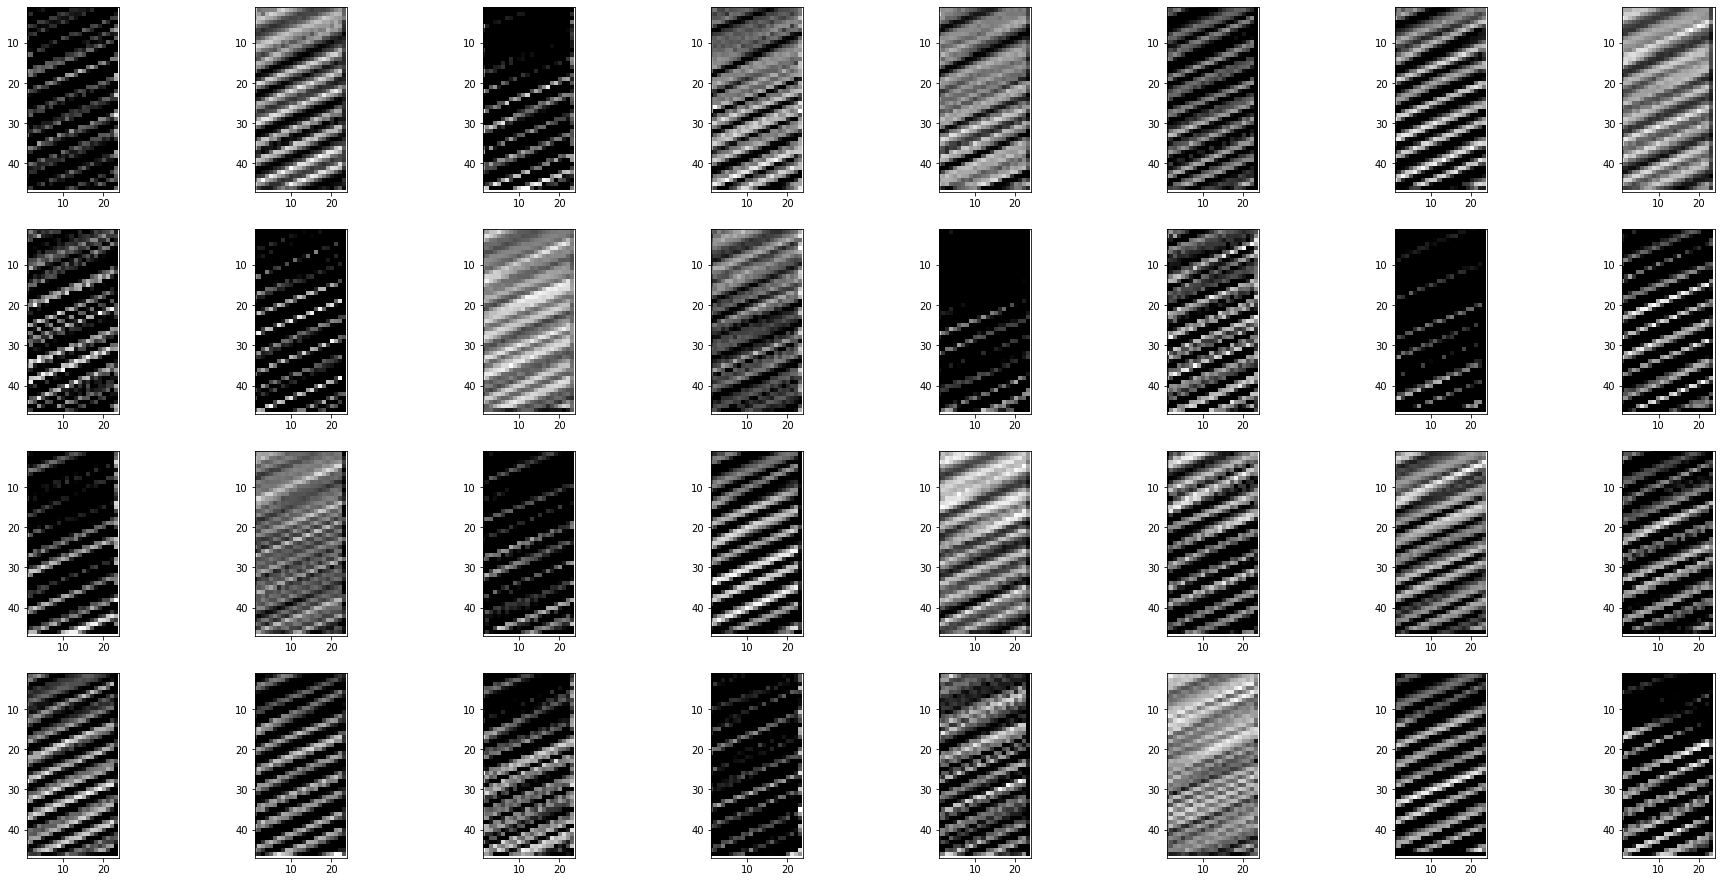

In [18]:
#  ある画像に対する中間層
from tensorflow.keras.models import Model
#layer_name = 'conv2d'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(data_origin[702].reshape(1,nx,ny,1))#phase4
print('intermediate_output.shape=',intermediate_output.shape)

nn=intermediate_output.shape[3]
nh=8
nw=8
plt.figure(1, figsize=(nw*4, nh*4))

#plt.axis('equal')
#plt.axis('square')

for n in range(nn):
    plt.subplot(nw,nh,n+1)
    w = intermediate_output[0, :, :, n].copy()
    m = w.min()
    M = w.max()
    w = (w-m)/(M-m)
#    plt.pcolor(w,cmap='gray')
    plt.xlim(1, w.shape[1])
    plt.ylim(w.shape[0], 1)
    plt.imshow(w,cmap='gray')

intermediate_output.shape= (1, 47, 24, 32)


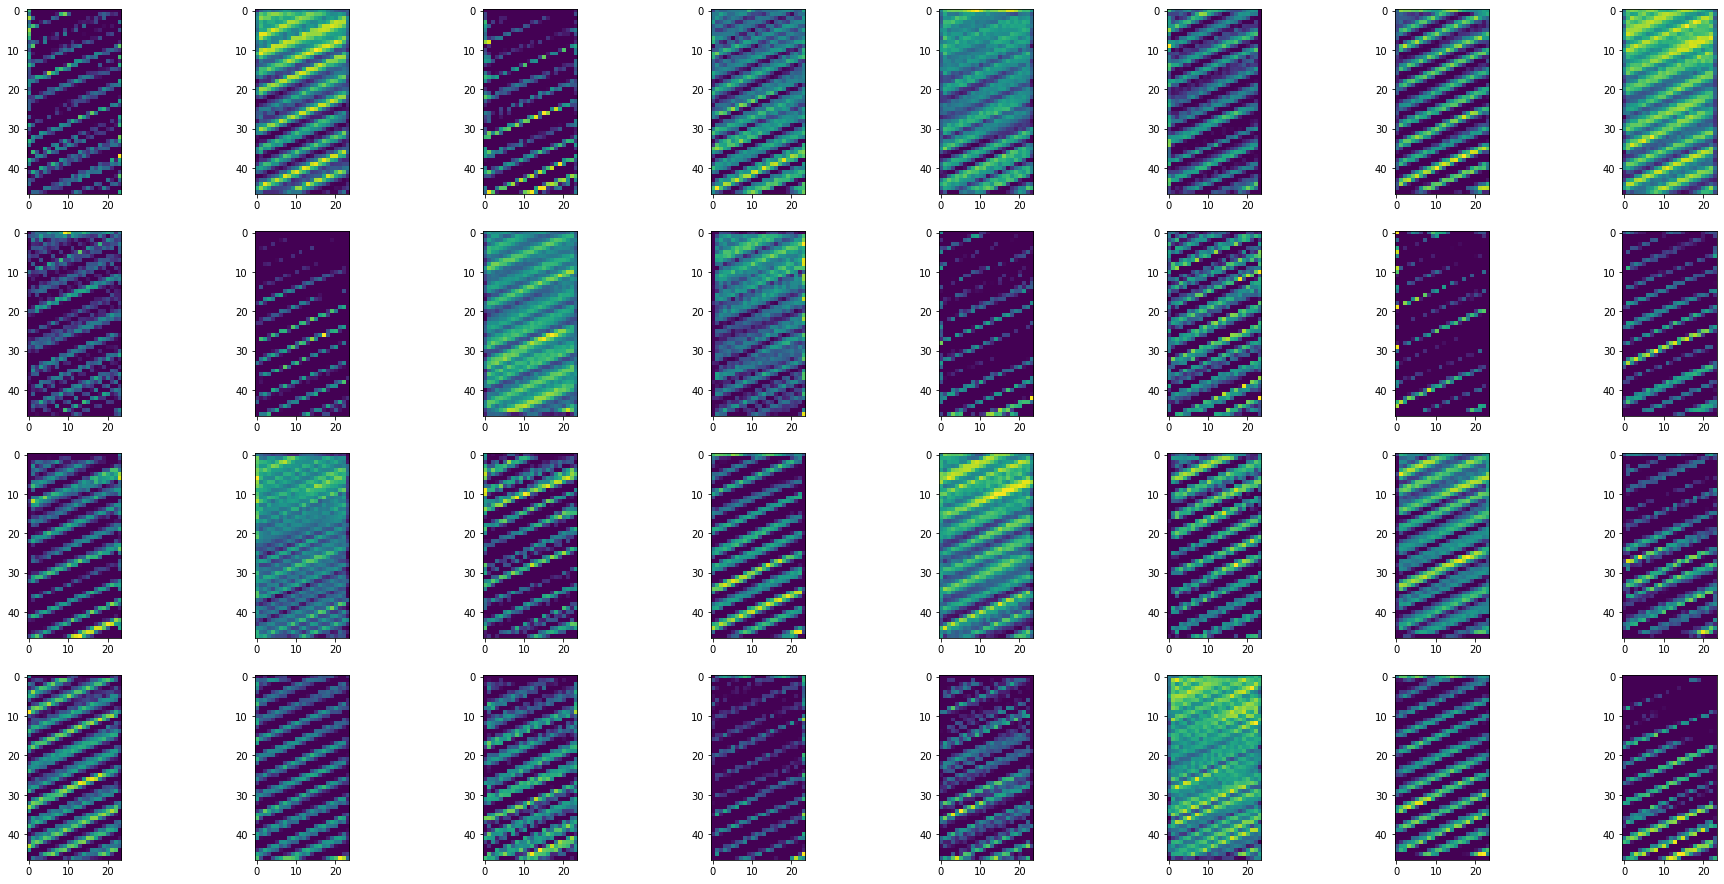

In [21]:
#  ある画像に対する中間層
from tensorflow.keras.models import Model
#layer_name = 'conv2d'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(data_origin[800].reshape(1,nx,ny,1))#phase4
print('intermediate_output.shape=',intermediate_output.shape)

nn=intermediate_output.shape[3]
nh=8
nw=8
plt.figure(1, figsize=(nw*4, nh*4))

#plt.axis('equal')
#plt.axis('square')

for n in range(nn):
    plt.subplot(nw,nh,n+1)
    w = intermediate_output[0, :, :, n].copy()
    m = w.min()
    M = w.max()
    w = (w-m)/(M-m)
    plt.imshow(w)

In [25]:
from tensorflow.keras import models
import tensorflow as tf
from tensorflow.keras import backend as K
import cv2
def grad_cam(input_model, x, layer_name):
    """
    Args: 
        input_model(object): モデルオブジェクト
        x(ndarray): 画像
        layer_name(string): 畳み込み層の名前
    Returns:
        output_image(ndarray): 元の画像に色付けした画像
    """

    # 画像の前処理
    # 読み込む画像が1枚なため、次元を増やしておかないとmode.predictが出来ない
    X = np.expand_dims(x, axis=0)
    preprocessed_input = X.astype('float32')   

    grad_model = models.Model([input_model.inputs], [input_model.get_layer(layer_name).output, input_model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(preprocessed_input)
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]

    # 勾配を計算
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')

    guided_grads = gate_f * gate_r * grads

    # 重みを平均化して、レイヤーの出力に乗じる
    weights = np.mean(guided_grads, axis=(0, 1))
    cam = np.dot(output, weights)
   

    # 画像を元画像と同じ大きさにスケーリング
    cam = cv2.resize(cam, (ny,nx), cv2.INTER_LINEAR)
    # ReLUの代わり
    cam  = np.maximum(cam, 0)
    # ヒートマップを計算
    heatmap = cam / cam.max()
    
    # モノクロ画像に疑似的に色をつける
    jet_cam = cv2.applyColorMap(np.uint8(255.0*heatmap), cv2.COLORMAP_JET)
    print(jet_cam.shape)
    # RGBに変換
    rgb_cam = cv2.cvtColor(jet_cam, cv2.COLOR_BGR2RGB)
    # もとの画像に合成
    output_image = (np.float32(rgb_cam))# + x / 2)  
#    output_image = np.float32(rgb_cam).reshape(nx,ny,1) + x / 2

    return output_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(191, 98, 3)
(191, 98, 3)


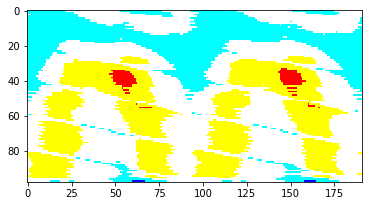

In [30]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
num = 33
image = grad_cam(model, x_test[num], 'conv2d_2') 
print(image.shape)
#array_to_img(image.reshape(ny,nx,3))
plt.subplot(1,1,1)
#plt.imshow(image.shape(ny,nx),cmap='jet')
plt.imshow(image)

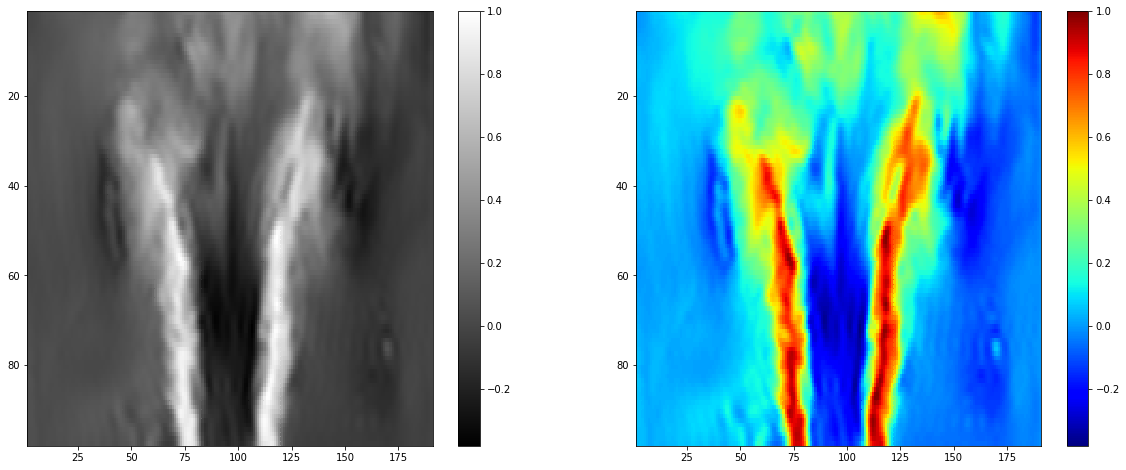

In [20]:
#データ図示
plt.figure(1, figsize=(20, 8))
plt.subplot(1,2,1)
plt.pcolor(x_test[num].reshape(ny,nx),cmap='gray')
plt.colorbar()
plt.xlim(1, nx)
plt.ylim(ny, 1)

plt.subplot(1,2,2)
plt.pcolor(x_test[num].reshape(ny,nx),cmap='jet')
plt.colorbar()
plt.xlim(1, nx)
plt.ylim(ny,1)

plt.show()

In [21]:
#予測結果表示
y_pred = model.predict(x_test[num].reshape(1,nx,ny,1))#.reshape(y_train.shape[0],)
print('正解ラベル=',np.argmax(y_test[num])+1,'予測結果=',np.argmax(y_pred)+1)

正解ラベル= 3 予測結果= 3


極大= [7, 8, 12, 25, 29, 34, 35, 36, 38, 39, 41, 44, 54, 57, 62, 64, 66, 72, 75, 82, 87, 89, 95, 108, 110, 118, 119, 125, 126, 137, 139, 144, 146, 147, 148, 150, 154, 158, 163, 168, 169, 173, 175, 179, 184, 185, 186, 187, 192, 194, 195, 198, 204, 209, 211, 213, 215, 216, 220, 224, 227, 230, 232, 233, 234, 239, 241, 244, 245, 246, 248, 253, 257, 261, 263, 265, 266, 267, 268]
下降変曲点= [3, 11, 14, 15, 23, 26, 28, 30, 32, 40, 53, 58, 60, 67, 71, 77, 78, 80, 85, 88, 96, 97, 98, 100, 101, 102, 103, 107, 113, 130, 132, 136, 140, 143, 151, 152, 155, 159, 165, 167, 177, 181, 182, 188, 217, 219, 223, 228, 229, 231, 235, 237, 238, 251, 254, 255, 260]
極小= [1, 2, 5, 6, 10, 13, 16, 17, 18, 19, 20, 24, 31, 33, 37, 45, 47, 48, 49, 51, 52, 56, 63, 65, 68, 69, 70, 74, 90, 92, 93, 99, 104, 109, 112, 114, 116, 117, 120, 121, 124, 127, 129, 134, 135, 142, 145, 156, 161, 170, 171, 180, 183, 189, 193, 199, 202, 203, 206, 210, 214, 218, 222, 225, 226, 242, 247, 252, 259, 269]
上昇変曲点②= [0, 4, 9, 21, 22, 27, 42, 43,

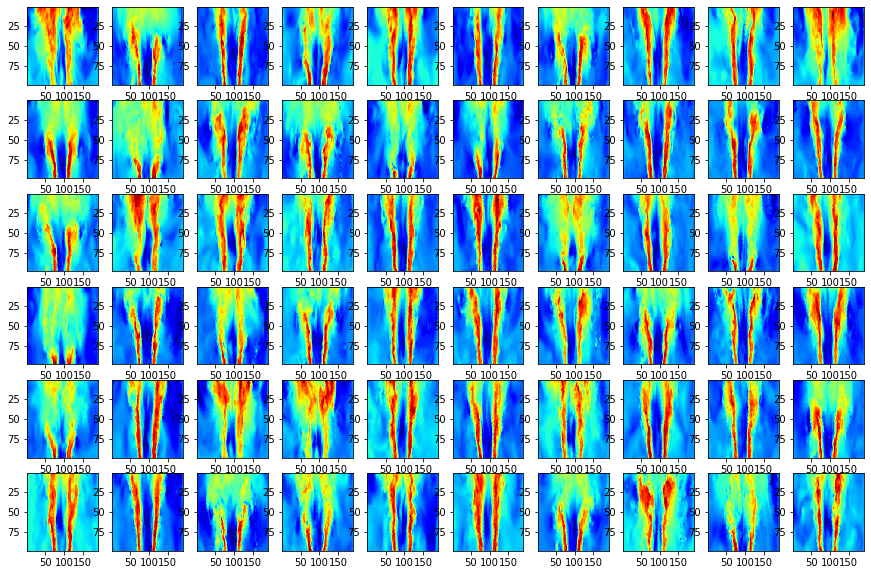

In [23]:
#データ図示
num = 60

print('極大=',[i for i, x in enumerate(y_test[:,0]) if x == 1])
print('下降変曲点=',[i for i, x in enumerate(y_test[:,1]) if x == 1])
print('極小=',[i for i, x in enumerate(y_test[:,2]) if x == 1])
print('上昇変曲点②=',[i for i, x in enumerate(y_test[:,3]) if x == 1])

plt.figure(1, figsize=(15, 10))

#plt.axis('equal')
#plt.axis('square')

for n in range(num*nz):
    plt.subplot(num*nz/10,10,n+1)
    plt.pcolor(x_test[n].reshape(ny,nx),cmap='jet')
#    plt.colorbar()
    plt.xlim(1, nx)
    plt.ylim(ny, 1)

weights.shape= (3, 3, 1, 8)


IndexError: index 8 is out of bounds for axis 3 with size 8

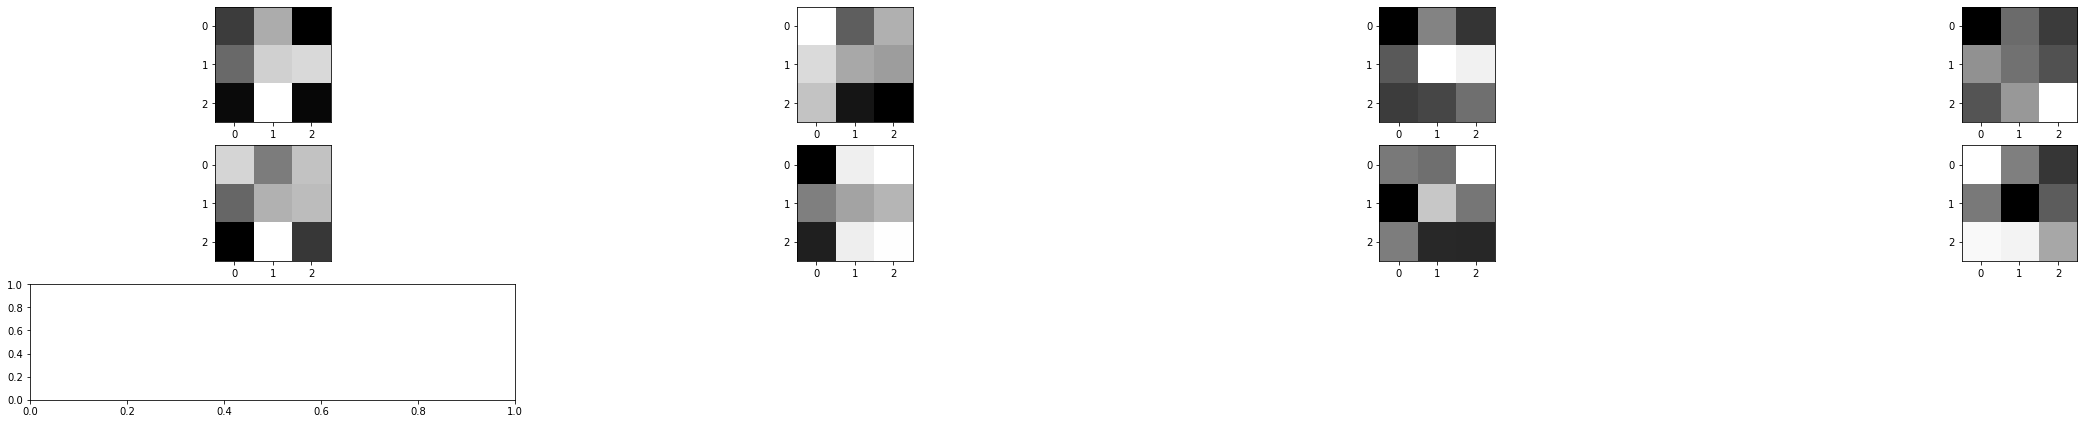

In [114]:
#＃中間層可視化
weights = model.get_layer("conv2d_2").get_weights()[0]
print('weights.shape=',weights.shape)

nn=32
nh=4
nw=8
plt.figure(1, figsize=(nw*5, nh*5))

#plt.axis('equal')
#plt.axis('square')

for n in range(nn):
    plt.subplot(nw,nh,n+1)
    w = weights[:, :, 0, n].copy()
    m = w.min()
    M = w.max()
    w = (w-m)/(M-m)
    plt.imshow(w,cmap='gray')
#    plt.colorbar()
#    plt.xlim(1, nx)
#    plt.ylim(1, ny)